<a href="https://colab.research.google.com/github/arkalim/Tensorflow/blob/master/Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import numpy as np

### # Define a tensor

In [2]:
t = torch.Tensor()

print(t)
print(type(t))

tensor([])
<class 'torch.Tensor'>


This creates an empty tensor (tensor with no data), but we'll get to adding data in just a moment.

### Tensor attributes
First, let’s look at a few tensor attributes. Every torch.Tensor has these attributes:

* torch.dtype
* torch.device
* torch.layout (specifies how tensors are stored in the memory)

In [3]:
print(t.dtype)
print(t.device)
print(t.layout)

torch.float32
cpu
torch.strided


One thing to keep in mind about tensor data types is that tensor operations between tensors must happen between tensors with the same type of data.

### Tensors have a torch.device
The device, cpu in our case, specifies the device (CPU or GPU) where the tensor's data is allocated. This determines where tensor computations for the given tensor will be performed.

**Note:** One thing to keep in mind about using multiple devices is that tensor operations between tensors must happen between tensors that exists on the same device.

In [4]:
device = torch.device('cuda:0')
print(device)

cuda:0


## Creating tensors using data
These are the primary ways of creating tensor objects (instances of the torch.Tensor class), with data (array-like) in PyTorch:

In [5]:
data = np.array([1,2,3])
type(data)

numpy.ndarray

In [6]:
# creating tensors using constructors
torch.Tensor(data)

tensor([1., 2., 3.])

### # creating tensors using factory function

In [7]:
torch.tensor(data)

tensor([1, 2, 3])

In [8]:
torch.as_tensor(data)

tensor([1, 2, 3])

In [9]:
torch.from_numpy(data)

tensor([1, 2, 3])

### Identity tensor

In [10]:
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

### Other tensors

In [11]:
torch.zeros(3,4)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [12]:
torch.ones(4,3)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [13]:
torch.rand(3)

tensor([0.0265, 0.8900, 0.0895])

# Creating tensors from data

In [14]:
torch.tensor(np.array([1,2,3]))

tensor([1, 2, 3])

In [15]:
torch.tensor(np.array([1.,2.,3.]))

tensor([1., 2., 3.], dtype=torch.float64)

In [16]:
torch.tensor(np.array([1,2,3]), dtype = torch.float32)

tensor([1., 2., 3.])

## Memory Sharing and Copying between the data and the tensor

In [17]:
data = np.array([1,2,3])
data

array([1, 2, 3])

In [0]:
t1 = torch.Tensor(data)
t2 = torch.tensor(data)
t3 = torch.as_tensor(data)
t4 = torch.from_numpy(data)

Modifying the  data but not the tensor

In [0]:
data[0] = 0
data[1] = 0
data[2] = 0

In [20]:
print(t1)
print(t2)
print(t3)
print(t4)

tensor([1., 2., 3.])
tensor([1, 2, 3])
tensor([0, 0, 0])
tensor([0, 0, 0])


This concludes that 1st two methods create a copy of the data, whereas the last two methods share the same memory for both data and tensor which means the code will run faster since no copying is needed.

## Flatten, Reshape and Squeeze Explained

In [0]:
t = torch.tensor([
    [1,1,1,1],
    [2,2,2,2],
    [3,3,3,3]
], dtype=torch.float32)

In [22]:
t.shape

torch.Size([3, 4])

In [23]:
t.size()

torch.Size([3, 4])

In [24]:
# find number of elements in the tensor
t.numel()

12

In [25]:
# find no. of axes
len(t.shape)

2

In [26]:
t.reshape(-1)

tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])

In [27]:
t.reshape(-1,2)

tensor([[1., 1.],
        [1., 1.],
        [2., 2.],
        [2., 2.],
        [3., 3.],
        [3., 3.]])

In [28]:
t.reshape(2,2,3)

tensor([[[1., 1., 1.],
         [1., 2., 2.]],

        [[2., 2., 3.],
         [3., 3., 3.]]])

In [29]:
# squeeze removes the axis with length of 1
t.reshape(1,12).squeeze()

tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])

In [30]:
# squeeze adds an axis with length of 1 along the specified dimension
t.reshape(12).unsqueeze(dim = 0)

tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])

In [31]:
# squeeze adds an axis with length of 1 along the specified dimension
t.reshape(12).unsqueeze(dim = 1)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [2.],
        [2.],
        [2.],
        [2.],
        [3.],
        [3.],
        [3.],
        [3.]])

In [32]:
t.flatten()

tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])

In [33]:
# concatenating

a = torch.tensor([
    [1,2,3],
    [1,2,3]
])

b = torch.tensor([
    [4,5,6],
    [4,5,6]
])

torch.cat((a,b), dim = 0)

tensor([[1, 2, 3],
        [1, 2, 3],
        [4, 5, 6],
        [4, 5, 6]])

In [34]:
torch.cat((a,b), dim = 1)

tensor([[1, 2, 3, 4, 5, 6],
        [1, 2, 3, 4, 5, 6]])

# CNN Flatten Operation Visualized - Tensor Batch Processing for Deep Learning

In [35]:
a = torch.ones(3,4)
b = a + 1
c = b + 1

print(a)
print(b)
print(c)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]])
tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


In [36]:
# stack the tensors on top of each other
torch.stack([a,b,c])

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[2., 2., 2., 2.],
         [2., 2., 2., 2.],
         [2., 2., 2., 2.]],

        [[3., 3., 3., 3.],
         [3., 3., 3., 3.],
         [3., 3., 3., 3.]]])

In [37]:
# often we need to unsqueeze grayscale images before feeding them to a neural net

torch.unsqueeze(torch.stack([a,b,c]), dim = 1)

tensor([[[[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]]],


        [[[2., 2., 2., 2.],
          [2., 2., 2., 2.],
          [2., 2., 2., 2.]]],


        [[[3., 3., 3., 3.],
          [3., 3., 3., 3.],
          [3., 3., 3., 3.]]]])

Brackets are arranged in the order [batch, channel, height, width]

In [38]:
t = torch.unsqueeze(torch.stack([a,b,c]), dim = 1)
print(t.shape)

torch.Size([3, 1, 3, 4])


In [39]:
# first image in the batch
t[0]

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [40]:
# first color channel of the first image
t[0][0]

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [41]:
# first row of first color channel of the first image
t[0][0][0]

tensor([1., 1., 1., 1.])

In [42]:
# when flattening images to feed to our CNN we don't want to flatten in batch axis
# this is specified using start_dim which tells the function which axis to start flattening 
t.flatten(start_dim = 1)

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.]])

# Tensor Reduction Operations
A reduction operation on a tensor is an operation that reduces the number of elements contained within the tensor.

In [0]:
t = torch.tensor([
    [1,2,3],
    [4,5,6],
    [7,8,9]
], dtype = torch.float32)

In [44]:
# sum of all the elements in the tensor
t.sum()

tensor(45.)

In [45]:
# product of all the elements in the tensor
t.prod()

tensor(362880.)

In [46]:
# mean of all the elements in the tensor
t.mean()

tensor(5.)

In [47]:
# standard deviation of all the elements in the tensor
t.std()

tensor(2.7386)

In [48]:
# number of elements in the tensor
t.numel()

9

All of these tensor methods reduce the tensor to a single element scalar valued tensor by operating on all the tensor's elements.

### We can select axes for reduction operation


In [49]:
print(t.mean(dim = 0))
print(t.mean(dim = 1))

tensor([4., 5., 6.])
tensor([2., 5., 8.])


In [50]:
print(t.sum(dim = 0))
print(t.sum(dim = 1))

tensor([12., 15., 18.])
tensor([ 6., 15., 24.])


In [51]:
# finding maximum value
t.max()

tensor(9.)

In [52]:
# finding argmax
t.argmax()

tensor(8)

## Preparing dataset(Fashion MNIST) 

Here, we will learn ETL pipeline (extract, transform, load)

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

torch: The top-level PyTorch package and tensor library.

torch.nn:	A subpackage that contains modules and extensible classes for building neural networks.

torch.optim:	A subpackage that contains standard optimization operations like SGD and Adam.

torch.nn.functional: A functional interface that contains typical operations used for building neural networks like loss functions and convolutions.

torchvision:	A package that provides access to popular datasets, model architectures, and image transformations for computer vision.

torchvision.transforms:	An interface that contains common transforms for image processing.


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
#from plotcm import plot_confusion_matrix

import pdb

torch.set_printoptions(linewidth=120)

torch.utils.data.Dataset:	An abstract class for representing a dataset.
torch.utils.data.DataLoader:	Wraps a dataset and provides access to the underlying data.

An abstract class is a Python class that has methods we must implement, so we can create a custom dataset by creating a subclass that extends the functionality of the Dataset class.

To create a custom dataset using PyTorch, we extend the Dataset class by creating a subclass that implements these required methods. Upon doing this, our new subclass can then be passed to the a PyTorch DataLoader object.

In [55]:
# Since we want our images to be transformed into tensors,
# we use the built-in transforms.ToTensor() transformation, 
# and since this dataset is going to be used for training,
# we’ll name the instance train_set.

# download the dataset if it doesn't exist on the disk

train_set = torchvision.datasets.FashionMNIST(
    root='./data/FashionMNIST'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

0it [00:00, ?it/s]

26427392it [00:01, 13935598.38it/s]                             


Extracting ./data/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 79764.46it/s]                            
0it [00:00, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz


4423680it [00:01, 4033094.37it/s]                             
0it [00:00, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 33633.03it/s]            

Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


All subclasses of the Dataset class must override __len__, that provides the size of the dataset, and __getitem__, supporting integer indexing in range from 0 to len(self) exclusive.

Specifically, there are two methods that are required to be implemented. The __len__ method which returns the length of the dataset, and the __getitem__ method that gets an element from the dataset at a specific index location within the dataset.

## Exploring the data

In [56]:
len(train_set)

60000

In [57]:
# print the target labels for all the 60000 images
train_set.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [58]:
# finding unique labels 
torch.unique(train_set.targets)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [59]:
# find how many of each labels exist in the dataset
train_set.targets.bincount()

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

This shows us that the Fashion-MNIST dataset is uniform with respect to the number of samples from each class. This means we have 6000 samples for each class. As a result, this dataset is said to be balanced. If the classes had a varying number of samples, we would call the set an unbalanced dataset.

## Accessing data in the training set
To access an individual element from the training set, we first pass the train_set object to Python’s iter() built-in function, which returns an object representing a stream of data.

With the stream of data, we can use Python built-in next() function to get the next data element in the stream of data. From this we are expecting to get a single sample, so we’ll name the result accordingly:

<class 'torch.Tensor'>
<class 'int'>
torch.Size([1, 28, 28])
9


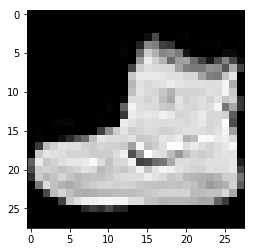

In [60]:
# get the next element (not batch)
image, label = next(iter(train_set))

print(type(image))
print(type(label))

print(image.shape)
print(label)

img = image.squeeze()

plt.imshow(img, cmap = 'gray')

## PyTorch DataLoader: Working with batches of data
We get a batch from the loader in the same way that we saw with the training set. We use the iter() and next() functions.

There is one thing to notice when working with the data loader. If shuffle=True, then the batch will be different each time a call to next occurs. With shuffle=True, the first samples in the training set will be returned on the first call to next. The shuffle functionality is turned off by default.

In [0]:
# To create a DataLoader wrapper for our training set, we do it like this:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=10, shuffle=True)

In [62]:
images, labels = next(iter(train_loader))
print(images.shape)
print(labels.shape)

torch.Size([10, 1, 28, 28])
torch.Size([10])


(batch size, number of color channels, image height, image width)

To plot a batch of images, we can use the torchvision.utils.make_grid() function to create a grid that can be plotted like so:

Labels:  tensor([3, 2, 2, 2, 2, 2, 5, 5, 3, 0])


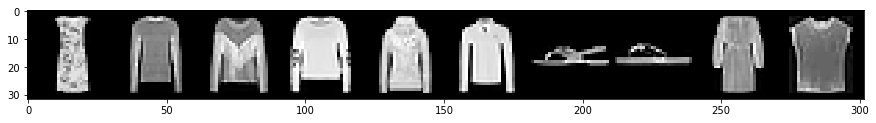

In [63]:
# make a grid with the images 
grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize = (15,4))
plt.imshow(np.transpose(grid,(1,2,0)))
#we can also use: grid.permute(1,2,0)

print('Labels: ',labels)

# Build PyTorch CNN - Object Oriented Neural Networks
To build neural networks in PyTorch, we extend the torch.nn.Module PyTorch class. This means we need to utilize a little bit of object oriented programming (OOP) in Python.

We’ll do a quick OOP review in this post to cover the details needed for working with PyTorch neural networks, but if you find that you need more, the Python docs have an overview tutorial [here.](https://https://docs.python.org/3/tutorial/classes.html)

## PyTorch’s torch.nn package
To build neural networks in PyTorch, we use the torch.nn package, which is PyTorch’s neural network (nn) library. We typically import the package like so:


```
import torch.nn as nn
```

## PyTorch's nn.Module class
As we know, deep neural networks are built using multiple layers. This is what makes the network deep. Each layer in a neural network has two primary components:

A transformation (code)
A collection of weights (data)
Like many things in life, this fact makes layers great candidates to be represented as objects using OOP. OOP is short for object oriented programming.

In fact, this is the case with PyTorch. Within the nn package, there is a class called Module, and it is the base class for all of neural network modules which includes layers.

This means that all of the layers in PyTorch extend the nn.Module class and inherit all of PyTorch’s built-in functionality within the nn.Module class. In OOP this concept is known as inheritance.

Even neural networks extend the nn.Module class. This makes sense because neural networks themselves can be thought of as one big layer 

### PyTorch nn.Modules have a forward() method
Forward pass is defined in this method. When we are building layers and networks, we must provide an implementation of the forward() method. The forward method is the actual transformation.

### PyTorch’s nn.functional package
When we implement the forward() method of our nn.Module subclass, we will typically use functions from the nn.functional package. This package provides us with many neural network operations that we can use for building layers. In fact, many of the nn.Module layer classes use nn.functional functions to perform their operations.

## Steps to create a model in PyTorch
* Create a neural network class that extends the nn.Module base class.
* In the class constructor, define the network’s layers as class attributes using pre-built layers from torch.nn.
* Use the network’s layer attributes as well as operations from the nn.functional API to define the network’s forward pass.

## Step 1 

In [0]:
# create a simple class
class Network:
    def __init__(self):
        self.layer = None

    def forward(self, t):
        t = self.layer(t)
        return t

This gives us a simple network class that has a single dummy layer inside the constructor and a dummy implementation for the forward function.

The implementation for the forward() function takes in a tensor t and transforms it using the dummy layer. After the tensor is transformed, the new tensor is returned.

This is a good start, but the class hasn’t yet extended the nn.Module class. To make our Network class extend nn.Module, we must do two additional things:

* Specify the nn.Module class in parentheses on line 1.
* Insert a call to the super class constructor on line 3 inside the constructor.

In [0]:
class Network(nn.Module):
    def __init__(self):
        super(Network,self).__init__()
        self.layer = None
        
    def forward(self,t):
        t = self.Layer(t)
        return t

These changes transform our simple neural network into a PyTorch neural network because we are now extending PyTorch's nn.Module base class.

With this, we are done! Now we have a Network class that has all of the functionality of the PyTorch nn.Module class.

## Step 2

In [0]:
class Network(nn.Module):
    def __init__(self):
        super(Network,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        
    def forward(self,t): 
        # implement the forward pass
        return t

Each of our layers extends PyTorch's neural network Module class. For each layer, there are two primary items encapsulated inside, a forward function definition and a weight tensor.

The weight tensor inside each layer contains the weight values that are updated as the network learns during the training process, and this is the reason we are specifying our layers as attributes inside our Network class.

PyTorch's neural network Module class keeps track of the weight tensors inside each layer. The code that does this tracking lives inside the nn.Module class, and since we are extending the neural network module class, we inherit this functionality automatically.

Remember, inheritance is one of those object oriented concepts that we talked about last time. All we have to do to take advantage of this functionality is assign our layers as attributes inside our network module, and the Module base class will see this and register the weights as learnable parameters of our network.

#### Parameter vs Argument
While parameters are used in function definitions as place-holders while arguments are the actual values that are passed to the function. The parameters can be thought of as local variables that live inside a function.

In our network's case, the names are the parameters and the values that we have specified are the arguments.

### Getting an instance of the Network
Remember, to get an object instance of our Network class, we type the class name followed by parentheses. When this code executes, the code inside the __init__ class constructor will run, assigning our layers as attributes before the object instance is returned.

In [67]:
network = Network()
print(network)

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)


This nice string representation comes from nn.Module base class. We can override this functionality using __repr__() 

In [68]:
class Network(nn.Module):
    
    # constructor function constructs objects
    def __init__(self):
        super(Network,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        
    def forward(self,t): 
        # implement the forward pass
        return t
    
    def __repr__(self):
        return 'Simple Model'
    
network = Network()
print(network)    

Simple Model


### Accessing specific layers of the model
we access attributes and methods of objects using dot notation.

In [69]:
network.conv1

Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))

### Accessing weights of a layer in the network
This is a good example that showcases how objects are nested. We first access the conv layer object that lives inside the network object.

Then, we access the weight tensor object that lives inside the conv layer object, so all of these objects are chained or linked together.



In [70]:
print(network.conv1.weight.shape)
print(network.conv1.weight)

torch.Size([6, 1, 5, 5])
Parameter containing:
tensor([[[[-0.0919,  0.1548, -0.0552, -0.1840,  0.1948],
          [-0.0446,  0.1990,  0.0299,  0.0940, -0.0937],
          [-0.1648,  0.0240,  0.0933, -0.1895,  0.0139],
          [ 0.0160,  0.0198,  0.1206, -0.0760, -0.0688],
          [ 0.1692,  0.0137,  0.0375, -0.1956,  0.1356]]],


        [[[-0.0597,  0.1695,  0.0258, -0.1834,  0.1185],
          [ 0.0633,  0.0134, -0.1708, -0.0287,  0.0189],
          [-0.1834,  0.1581,  0.1628,  0.0663,  0.1070],
          [-0.1178,  0.0575,  0.0450, -0.1073, -0.1695],
          [ 0.0213,  0.0126,  0.0244, -0.0152,  0.1942]]],


        [[[ 0.0781,  0.1767, -0.0103, -0.0761, -0.0909],
          [-0.1743,  0.0172, -0.0245, -0.1450,  0.1348],
          [ 0.1413, -0.0834, -0.1222, -0.0198,  0.1272],
          [ 0.1682, -0.0972, -0.0656,  0.1159, -0.1758],
          [-0.0223, -0.1861, -0.1667, -0.0264, -0.1950]]],


        [[[-0.0806,  0.1407, -0.1901, -0.1906, -0.0671],
          [ 0.1875, -0.1765, 

**Note:** One thing to notice about the weight tensor output is that it says parameter containing at the top of the output. This is because this particular tensor is a special tensor because its values or scalar components are learnable parameters of our network.

### PyTorch Parameter Class
To keep track of all the weight tensors inside the network. PyTorch has a special class called Parameter. The Parameter class extends the tensor class, and so the weight tensor inside every layer is an instance of this Parameter class. This is why we see the Parameter containing text at the top of the string representation output.
### Accessing the Networks Parameters



In [71]:
for param in network.parameters():
    print(param.shape)

torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([12, 6, 5, 5])
torch.Size([12])
torch.Size([120, 192])
torch.Size([120])
torch.Size([60, 120])
torch.Size([60])
torch.Size([10, 60])
torch.Size([10])


In [72]:
for name, param in network.named_parameters():
    print('Name: {}      Shape: {}'.format(name, param.shape))

Name: conv1.weight      Shape: torch.Size([6, 1, 5, 5])
Name: conv1.bias      Shape: torch.Size([6])
Name: conv2.weight      Shape: torch.Size([12, 6, 5, 5])
Name: conv2.bias      Shape: torch.Size([12])
Name: fc1.weight      Shape: torch.Size([120, 192])
Name: fc1.bias      Shape: torch.Size([120])
Name: fc2.weight      Shape: torch.Size([60, 120])
Name: fc2.bias      Shape: torch.Size([60])
Name: out.weight      Shape: torch.Size([10, 60])
Name: out.bias      Shape: torch.Size([10])


### Callable Layers and Neural Networks
Instead of calling the forward() method directly, we call the object instance. After the object instance is called, the __call__() method is invoked under the hood, and the __call__() in turn invokes the forward() method. This applies to all PyTorch neural network modules, namely, networks and layers.

## Step 3 Forward Pass

Each of these layers is comprised of a collection of weights (data) and a collection operations (code). The weights are encapsulated inside the nn.Conv2d() class instance. The relu() and the max_pool2d() calls are just pure operations. Neither of these have weights, and this is why we call them directly from the nn.functional API.

In [0]:
class Network(nn.Module):
    
    # constructor function constructs objects
    def __init__(self):
        super(Network,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        
    def forward(self,t): 
        
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size = 2, stride = 2)
        
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size = 2, stride = 2)
        
        t = t.reshape(-1, 12 * 4 * 4)
        t = self.fc1(t)
        t = F.relu(t)
        
        t = self.fc2(t)
        t = F.relu(t)
        
        t = self.out(t)
        #t = F.softmax(t, dim = 1)
       
        return t
    

The values inside each of the ten components will correspond to the prediction value for each of our prediction classes.

Inside the network we usually use relu() as our non-linear activation function, but for the output layer, whenever we have a single category that we are trying to predict, we use softmax(). The softmax function returns a positive probability for each of the prediction classes, and the probabilities sum to 1.


 
However, in our case, we won't use softmax() because the loss function that we'll use, F.cross_entropy(), implicitly performs the softmax() operation on its input, so we'll just return the result of the last linear transformation.

The implication of this is that our network will be trained using the softmax operation but will not need to compute the additional operation when the network is used for inference after the training process is complete.

### Predicting with the network: Forward pass
Before we being, we are going to turn off PyTorch’s gradient calculation feature. This will stop PyTorch from automatically building a computation graph as our tensor flows through the network.

The computation graph keeps track of the network's mapping by tracking each computation that happens. The graph is used during the training process to calculate the derivative (gradient) of the loss function with respect to the network’s weights.

Since we are not training the network yet, we aren’t planning on updating the weights, and so we don’t require gradient calculations. We will turn this back on when training begins.

### Turning off the computation graph

In [74]:
# turning off dynamic computational graph
torch.set_grad_enabled(False)

In [75]:
# create an instance of the Network class
network = Network()

image, label = next(iter(train_set))
print(image.shape)

# unsqueeze to add a dimension for batch
image = image.unsqueeze(0)
print(image.shape)

pred = network(image)
print(pred)

print('Prediction: {}'.format(pred.argmax(dim = 1)))
print('Target Label: {}'.format(label))

# If we want th epredictions as probability distribution
print('Prediction: {}'.format(F.softmax(pred,dim = 1)))

torch.Size([1, 28, 28])
torch.Size([1, 1, 28, 28])
tensor([[-0.0967, -0.0576,  0.0862, -0.0516, -0.1085, -0.0490,  0.0748,  0.0182,  0.1227, -0.0943]])
Prediction: tensor([8])
Target Label: 9
Prediction: tensor([[0.0919, 0.0956, 0.1104, 0.0961, 0.0908, 0.0964, 0.1091, 0.1031, 0.1145, 0.0921]])


The prediction in this case is incorrect, which is what we expect because the weights in the network were generated randomly.

### Predicting on a batch of data

In [76]:
from torch.utils.data import DataLoader 

data_loader = DataLoader(train_set, batch_size = 10, shuffle = True)

images, labels = next(iter(data_loader))

print(images.shape)
print(labels.shape)

predictions = network(images)

print(predictions.argmax(dim = 1))
print(labels)

# Element wise comparison between labels and predictions
# This can be used to calculate accuracy
print(predictions.argmax(dim = 1).eq(labels))

# Find number of correct predictions
# .item() returns the value of a 1x1 tensor (scalar)
print(predictions.argmax(dim = 1).eq(labels).sum().item())

torch.Size([10, 1, 28, 28])
torch.Size([10])
tensor([8, 8, 8, 8, 8, 8, 8, 8, 8, 8])
tensor([8, 7, 0, 8, 2, 1, 8, 7, 6, 1])
tensor([1, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=torch.uint8)
3


## Training

In [77]:
# turn on computation graph
torch.set_grad_enabled(True)

train_loader = DataLoader(train_set, batch_size = 1000, shuffle = True)

images, labels = next(iter(train_loader))

preds = network(images)

# defining the loss function
loss = F.cross_entropy(preds, labels)

print('Loss before Training: {}'.format(loss.item()))

# define a function to find the number of correct predictions
def correct_predictions(pred, label):
    return pred.argmax(dim = 1).eq(label).sum().item()

Loss before Training: 2.3105945587158203


### Calculating the Gradients
The computation graph is then used by PyTorch to calculate the gradients of the loss function with respect to the network's weights. The gradients are tensors that are accessible in the grad (short for gradient) attribute of the weight tensor of each layer.

In [78]:
# since we have not calculated the gradients yet, they are none
print(network.conv1.weight.grad)

# To calculate the gradients, we call the backward() method on the loss tensor, like so:
loss.backward()

# print the shape of the gradients of conv1
print(network.conv1.weight.grad.shape)

None
torch.Size([6, 1, 5, 5])


### Updating the weights (optimize)
These gradients are used by the optimizer to update the respective weights. To create our optimizer, we use the torch.optim package that has many optimization algorithm implementations that we can use. We'll use Adam for our example.

In [0]:
# create an instance of Adam optimizer
# we are passing network.parameters() as it contains all the network's variables
optimizer = optim.Adam(network.parameters(), lr=0.01)

# Updating the weights
optimizer.step()

When the step() function is called, the optimizer updates the weights using the gradients that are stored in the network's parameters. This means that we should expect our loss to be reduced if we pass the same batch through the network again. Checking this, we can see that this is indeed the case:

In [80]:
preds = network(images)

# defining the loss function
loss = F.cross_entropy(preds, labels)

print('Loss after 1 step of optimization: {}'.format(loss.item()))

print(correct_predictions(preds, labels))

Loss after 1 step of optimization: 2.2929439544677734
94


## Create a training Loop

In [83]:
num_epochs = 100

train_steps = 1

train_loader = DataLoader(train_set, batch_size = 60000, shuffle = True)

for epoch in range(num_epochs):
    
    train_loss = 0
    
    for step in range(1,train_steps+1):
        
        images, labels = next(iter(train_loader))
        
        preds = network(images)
        
        correct_preds = correct_predictions(preds, labels)
        
        train_loss_step = F.cross_entropy(preds, labels)
        
        optimizer = optim.Adam(network.parameters(), lr = 0.001)
        
        # clear all the gradients before calculating the gradients
        optimizer.zero_grad()
        
        # calculate the gradients
        train_loss_step.backward()
        
        # update the parameters
        optimizer.step()
        
        train_loss += train_loss_step
        
    train_loss /= train_steps
    print('Epoch: {}   Train Loss: {}  Correct Predictions: {}/60000'.format(epoch,train_loss, correct_preds))

Epoch: 0   Train Loss: 1.7009385824203491  Correct Predictions: 17929/60000
Epoch: 1   Train Loss: 1.5319856405258179  Correct Predictions: 24268/60000
Epoch: 2   Train Loss: 1.4026206731796265  Correct Predictions: 29690/60000
Epoch: 3   Train Loss: 1.310050368309021  Correct Predictions: 33500/60000
Epoch: 4   Train Loss: 1.2438098192214966  Correct Predictions: 35518/60000
Epoch: 5   Train Loss: 1.1926342248916626  Correct Predictions: 36122/60000
Epoch: 6   Train Loss: 1.148433804512024  Correct Predictions: 36413/60000
Epoch: 7   Train Loss: 1.109778881072998  Correct Predictions: 36622/60000
Epoch: 8   Train Loss: 1.0771751403808594  Correct Predictions: 37350/60000
Epoch: 9   Train Loss: 1.0466846227645874  Correct Predictions: 37405/60000
Epoch: 10   Train Loss: 1.0298590660095215  Correct Predictions: 38023/60000
Epoch: 11   Train Loss: 1.017913579940796  Correct Predictions: 37535/60000
Epoch: 12   Train Loss: 1.0118286609649658  Correct Predictions: 38213/60000
Epoch: 13   T